# Pertemuan 4

- Image Crop 
- Image Resize 
- Image Color Conversion

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

## 1. Image Crop

### 1.1 Basic crop
- crop image pada OpenCV dilakukan dengan menggunakan *numpy slicing*
- dengan notasi `image_array[y_min:y_max , x_min:x_max]`
- dimana `y_min`, `y_max`, `x_min` dan `x_max` merupakan titik pixel batas area yang ingin di crop.

<img src="resource/crop_img.png" style="width: 400px;"></img> <br><br>
<img src="resource/crop_image_2.png" style="width: 350px;"></img>

In [2]:
img = cv2.imread('lena.jpg')

img.shape

(344, 354, 3)

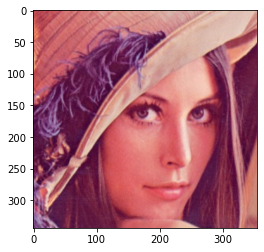

In [3]:
plt.imshow(img[:,:,::-1])

- crop dengan index positif

In [10]:
# crop image[y_min:y_max, x_min:x_max]
img_crop = img[100:300, 100:300] 

In [11]:
img_crop.shape

(200, 200, 3)

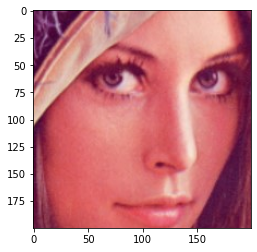

In [12]:
plt.imshow(img_crop[:,:,::-1])

- crop dengan index negatif

In [13]:
# crop image[y_min:y_max , x_min:x_max]
img_crop = img[50:-50, 50:-50] 

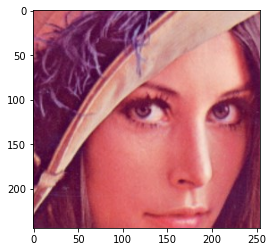

In [14]:
plt.imshow(img_crop[:,:,::-1])

In [15]:
img_crop.shape

(244, 254, 3)

### 1.2 read & crop multiple image

In [16]:
image_list = []
labels = []

for folder in os.listdir("lfw_dataset"):
    for file in os.listdir("lfw_dataset/" + folder):
        img = cv2.imread("lfw_dataset/" + folder + "/" + file)
        img_crop = img[70:-70, 70:-70]  # crop image 
        image_list.append(img_crop)
        labels.append(folder) # append label (name) of image

In [17]:
len(image_list)

20

In [18]:
labels

['Angelina_Jolie',
 'Angelina_Jolie',
 'Angelina_Jolie',
 'Angelina_Jolie',
 'Angelina_Jolie',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Donald_Rumsfeld',
 'Donald_Rumsfeld',
 'Donald_Rumsfeld',
 'Donald_Rumsfeld',
 'Donald_Rumsfeld',
 'Tony_Blair',
 'Tony_Blair',
 'Tony_Blair',
 'Tony_Blair',
 'Tony_Blair']

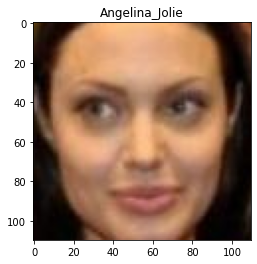

In [19]:
idx = 1

img = image_list[idx]

plt.title(labels[idx])
plt.imshow(img[:,:,::-1])

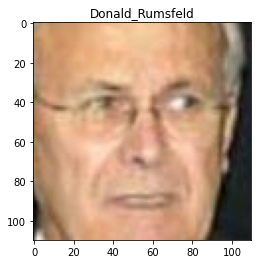

In [20]:
idx = 11

img = image_list[idx]

plt.title(labels[idx])
plt.imshow(img[:,:,::-1])

### 1.3 display all croped image

In [21]:
list(range(len(image_list)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

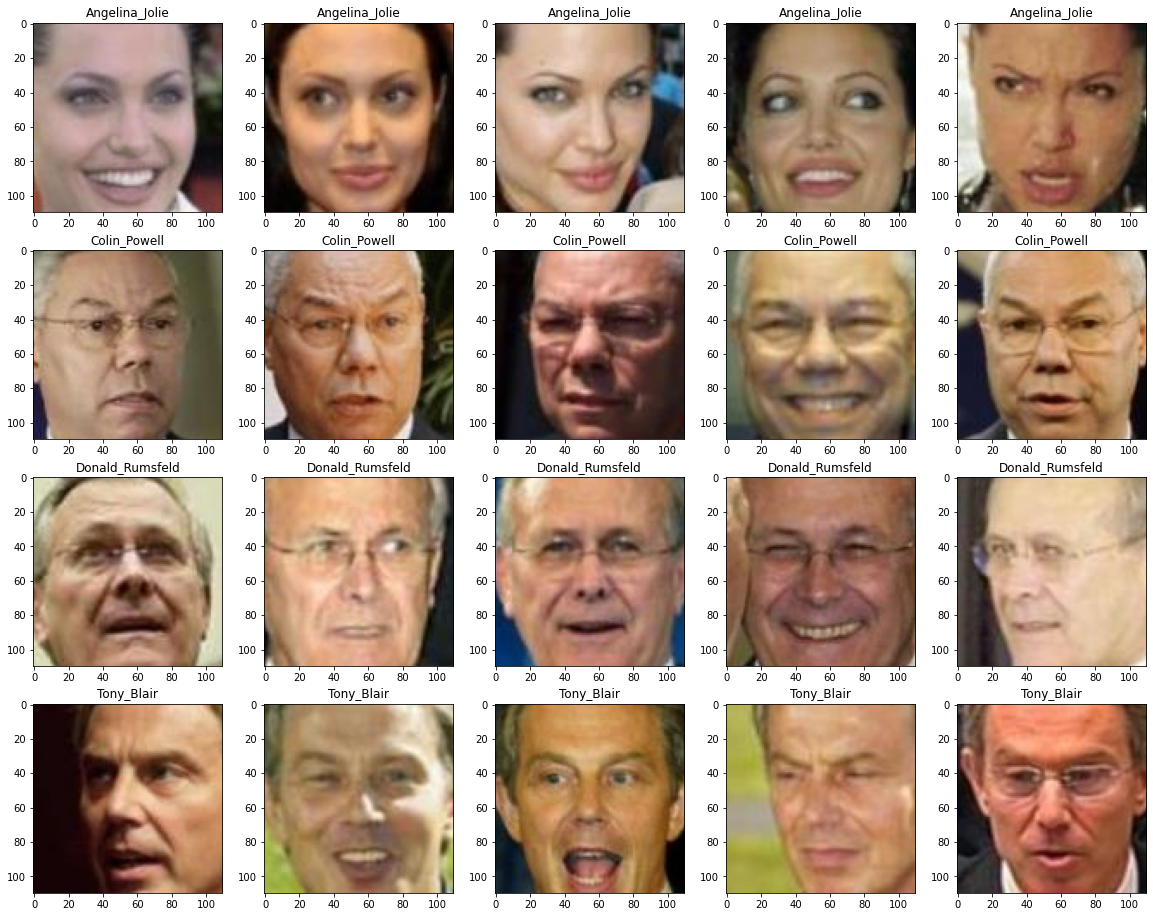

In [22]:

plt.figure(figsize=(20,16))
for i in range(len(image_list)):
    
    img = image_list[i]
    plt.subplot(4, 5, i + 1)
    plt.title(labels[i])
    plt.imshow(img[:, :, ::-1])

### 1.4 save croped image

 - create folder using `os` library

In [26]:
os.mkdir("croped_face") # create folder

- check if path / folder exist using `os` library

In [25]:
os.path.exists("croped_face") # check if folder exist

False

In [29]:
os.path.exists("lfw_dataset\Angelina_Jolie")

True

- concate path

In [37]:
os.path.join("Colin_Powell\\", "Colin_Powell_001.jpg") # concate folder and filename

'Colin_Powell\\Colin_Powell_001.jpg'

In [38]:
os.path.join(*["croped_face", "Colin_Powell", "Colin_Powell_001.jpg"]) # concate multiple folder and filename

'croped_face\\Colin_Powell\\Colin_Powell_001.jpg'

In [39]:
face_folder = "croped_face"

os.path.join(*[face_folder, labels[6], "Colin_Powell_001.jpg"])

'croped_face\\Colin_Powell\\Colin_Powell_001.jpg'

- define image filename 

In [42]:
i = 7

labels[i] # labels variable contain image name

'Colin_Powell'

In [43]:
i = 7

labels[i] + "_%d.jpg" % i

'Colin_Powell_7.jpg'

In [44]:
i = 7

labels[i] + "_%03d.jpg" % i # name with 4 digit padding number

'Colin_Powell_007.jpg'

In [48]:
face_folder = "croped_face"
i = 7

filen_name = labels[i] + "_%04d.jpg" % i
os.path.join(*[face_folder, labels[7], filen_name])

'croped_face\\Colin_Powell\\Colin_Powell_0007.jpg'

- save croped face to folder **(option 1)**

In [49]:
list(range(len(image_list)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [51]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # save image
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    
    cv2.imwrite(file_path, img)

- save croped face to folder, delete if image exist **(option 2)**

In [52]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # remove image if exist
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    if os.path.exists(file_path) :
        os.remove(file_path) # remove file using os.remove
        
    # save image
    cv2.imwrite(file_path, img)

___

## 2. Image Resize

![](resource/resize.jpg)
- untuk melakukan resize image pada OpenCV diprkenalkan beberapa method berikut :
    - `cv2.resize(img, (w_new, h_new))` : resize `img` ke ukuran `w_new` x `h_new`

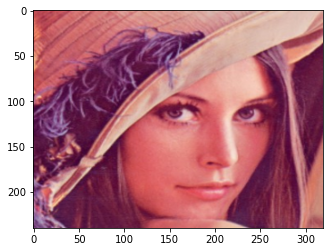

In [53]:
img = cv2.imread('lena.jpg')

# resize image (new_widht, new_height)
img_resize = cv2.resize(img, (320, 240))  

# show image 
plt.imshow(img_resize[:,:,::-1])

- resize dengan menggunakan rasio ukuran original (hitung manual)

masukan rasio resize [0 - 1.0] :  0.7


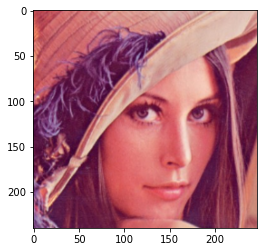

In [54]:
ratio = float(input("masukan rasio resize [0 - 1.0] : "))

img = cv2.imread('lena.jpg')
h, w, c = img.shape

width = int(w* ratio)
height = int(h * ratio)

# resize image (new_widht, new_height)
img_resize = cv2.resize(img, (width, height))  

# show image 
plt.imshow(img_resize[:,:,::-1])

In [55]:
img_resize.shape

(240, 247, 3)

- resize dengan menggunakan rasio ukuran original (`fx`, `fy`)

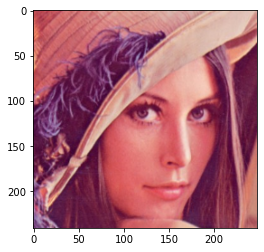

In [57]:
img = cv2.imread('lena.jpg')

# resize image (new_widht, new_height)
img_resize = cv2.resize(img, (0,0), fx=0.7, fy=0.7)  

# show image 
plt.imshow(img_resize[:,:,::-1])

In [58]:
img_resize.shape

(241, 248, 3)

- resize with **interpolation**
- Interpolation parameter :
    - `cv2.INTER_NEAREST` : This is using a **nearest-neighbor interpolation** to **shrink an image**.
    - `cv2.INTER_LINEAR` : This is primarily used when **larging** is required (default).
    - `cv2.INTER_AREA` : This is used when we need need to **shrink an image** (the best).
    - `cv2.INTER_CUBIC` : This is **slow** for **larging image**, but more efficient (**higer quality**).<br><br>
- Interpolation Method : <br>
<img src="resource/interpolation.png" style="width: 400px;"></img>
- Nearest Neighbor Interpolation : <br>
<img src="resource/Nearest_Neighbor.png" style="width: 400px;"></img>
- Linear Interpolation : <br>
<img src="resource/Bilinear_interpolation.png" style="width: 400px;"></img>
- Cubic Interpolation : <br>
<img src="resource/Bicubic_interpolation.png" style="width: 400px;"></img>
- Inter Area Interpolationis :
    - is a **linear interpolation** with slightly more complicated coefficient values.

In [60]:
# ---------- shringking -------
img = cv2.imread('apple.jpg')

# resize image (new_widht, new_height)
img_resize_INTER_LINEAR = cv2.resize(img, (0,0), fx=2.5, fy=2.5) 
img_resize_INTER_NEAREST = cv2.resize(img, (0,0), fx=2.5, fy=2.5, interpolation=cv2.INTER_NEAREST) 

# show image 
cv2.imshow('Original Image', img)
cv2.imshow('INTER_LINEAR Resized Image', img_resize_INTER_LINEAR)
cv2.imshow('INTER_NEAREST Resized Image', img_resize_INTER_NEAREST)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
# ---------- larging -------
img = cv2.imread('logo-python.png')

# resize image (new_widht, new_height)
img_resize = cv2.resize(img, (0,0), fx=3.5, fy=3.5) 
img_resize_INTER_CUBIC = cv2.resize(img, (0,0), fx=3.5, fy=3.5, interpolation=cv2.INTER_CUBIC) 
img_resize_INTER_NEAREST = cv2.resize(img, (0,0), fx=3.5, fy=3.5, interpolation=cv2.INTER_NEAREST) 
img_resize_INTER_AREA = cv2.resize(img, (0,0), fx=3.5, fy=3.5, interpolation=cv2.INTER_AREA) 

# show image 
cv2.imshow('Original Image', img)
cv2.imshow('INTER_LINEAR Resized Image', img_resize)
cv2.imshow('INTER_CUBIC Resized Image', img_resize_INTER_CUBIC)
cv2.imshow('INTER_NEAREST Resized Image', img_resize_INTER_NEAREST)
cv2.imshow('INTER_AREA Resized Image', img_resize_INTER_AREA)
cv2.waitKey(0)
cv2.destroyAllWindows()

- read, crop & resize multiple image

In [63]:
image_list = []
labels = []

for folder in os.listdir("lfw_dataset"):
    for file in os.listdir("lfw_dataset/" + folder):
        img = cv2.imread("lfw_dataset/" + folder + "/" + file)
        
        img_crop = img[70:-70, 70:-70]  # crop image 
        img_resize = cv2.resize(img_crop, (100, 100)) # resize to 100 x 100 pixel
        
        image_list.append(img_resize)
        labels.append(folder) # append label (name) of image

- display crop & resized image

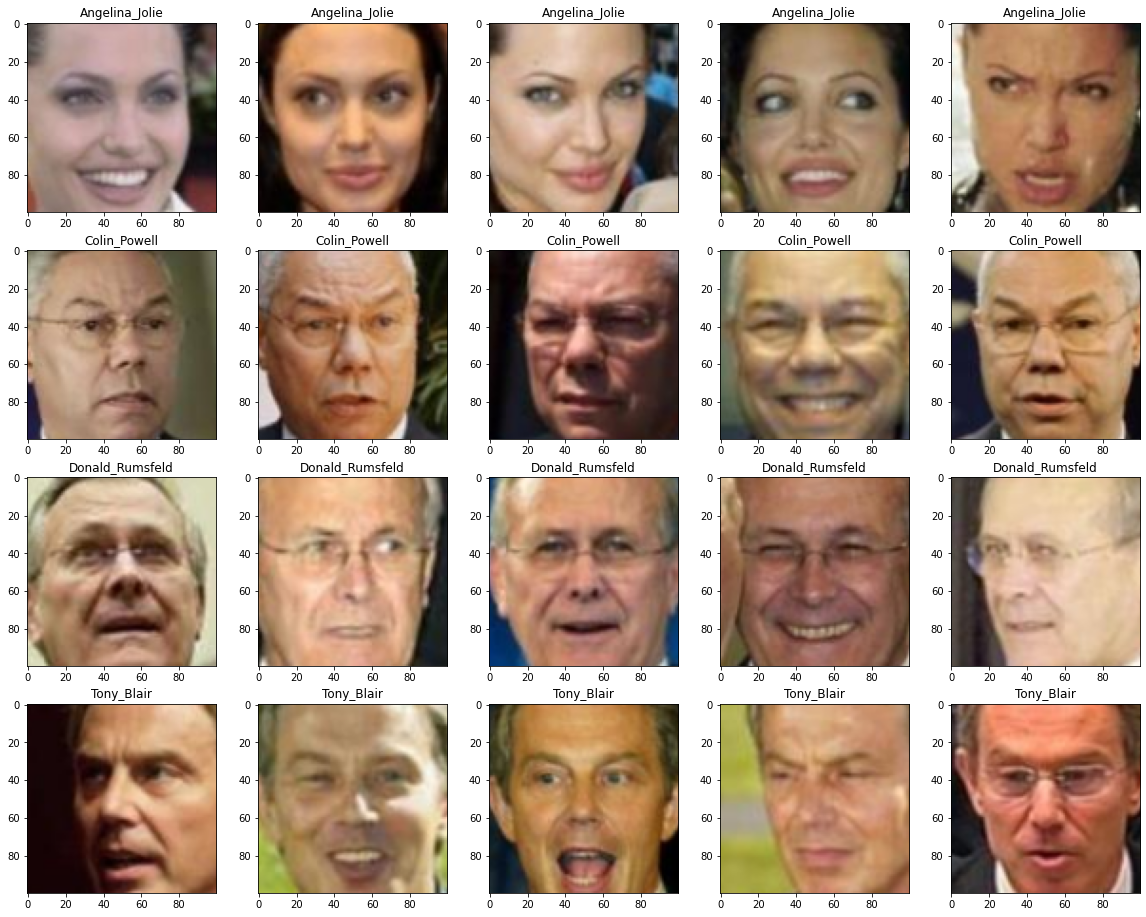

In [64]:
plt.figure(figsize=(20,16))
for i in range(len(image_list)):
    
    img = image_list[i]
    plt.subplot(4, 5, i + 1)
    plt.title(labels[i])
    plt.imshow(img[:, :, ::-1])

- save crop & resized image

In [65]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # remove image if exist
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    if os.path.exists(file_path) :
        os.remove(file_path) # remove file using os.remove
        
    # save image
    cv2.imwrite(file_path, img)

___

## 3. Image Color Conversion

![](resource/gray_image.png)
- Diperkenalkan method `cv2.cvtColor()` untuk color conversion pada OpenCV
- Berikut adalah parameter convert color yang dapat digunakan :
    - convert BGR <--> RGB \
    `cv2.COLOR_BGR2RGB` \
    `cv2.COLOR_RGB2BGR`
    - convert BGR <--> HSV \
    `cv2.COLOR_BGR2HSV` \
    `cv2.COLOR_HSV2RGB`
    - convert BGR <--> BGRA \
    `cv2.COLOR_BGR2BGRA` \
    `cv2.COLOR_BGRA2BGR`
    - convert RGB <--> RGBA \
    `cv2.COLOR_RGB2BGRA` \
    `cv2.COLOR_RGBA2BGR`
    - convert BGR <--> GRAY \
    `cv2.COLOR_BGR2GRAY` \
    `cv2.COLOR_GRAY2RGB` <br><br>
- Convert BGR to RGB Ilustration <br>
    - OpenCV using **Rec. 601 luma** formula to calculate grayscale image :
    $\text{RGB[A] to Gray:} \quad Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$ <br><br>
    <img src="resource/gray_image_2.png" style="width: 400px;"></img><br><br>
- Source :
    - [OpenCV cvtColor Doc](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#void%20cvtColor%28InputArray%20src,%20OutputArray%20dst,%20int%20code,%20int%20dstCn%29)
    - [Luma Formula (Grayscale Transformation)](https://en.wikipedia.org/wiki/Luma_%28video%29#Rec._601_luma_versus_Rec._709_luma_coefficients)

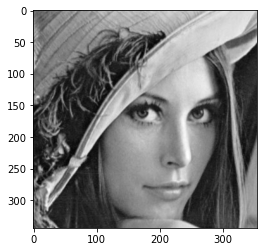

In [68]:
# convert BGR to Gray
img = cv2.imread("lena.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show image 
plt.imshow(img_gray, cmap="gray")

- grayscale image shape

In [69]:
img_gray.shape

(344, 354)

In [70]:
img_gray.dtype

dtype('uint8')

In [71]:
img.shape

(344, 354, 3)

- read, crop, resize & convert to grayscale all image dataset

In [72]:
image_list = []
labels = []

for folder in os.listdir("lfw_dataset"):
    for file in os.listdir("lfw_dataset/" + folder):
        img = cv2.imread("lfw_dataset/" + folder + "/" + file)
        
        img_crop = img[70:-70, 70:-70]  # crop image 
        img_resize = cv2.resize(img_crop, (100, 100)) # resize to 100 x 100 pixel
        img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
        
        image_list.append(img_gray)
        labels.append(folder) # append label (name) of image

- display croped, resized and grayscled all image dataset 

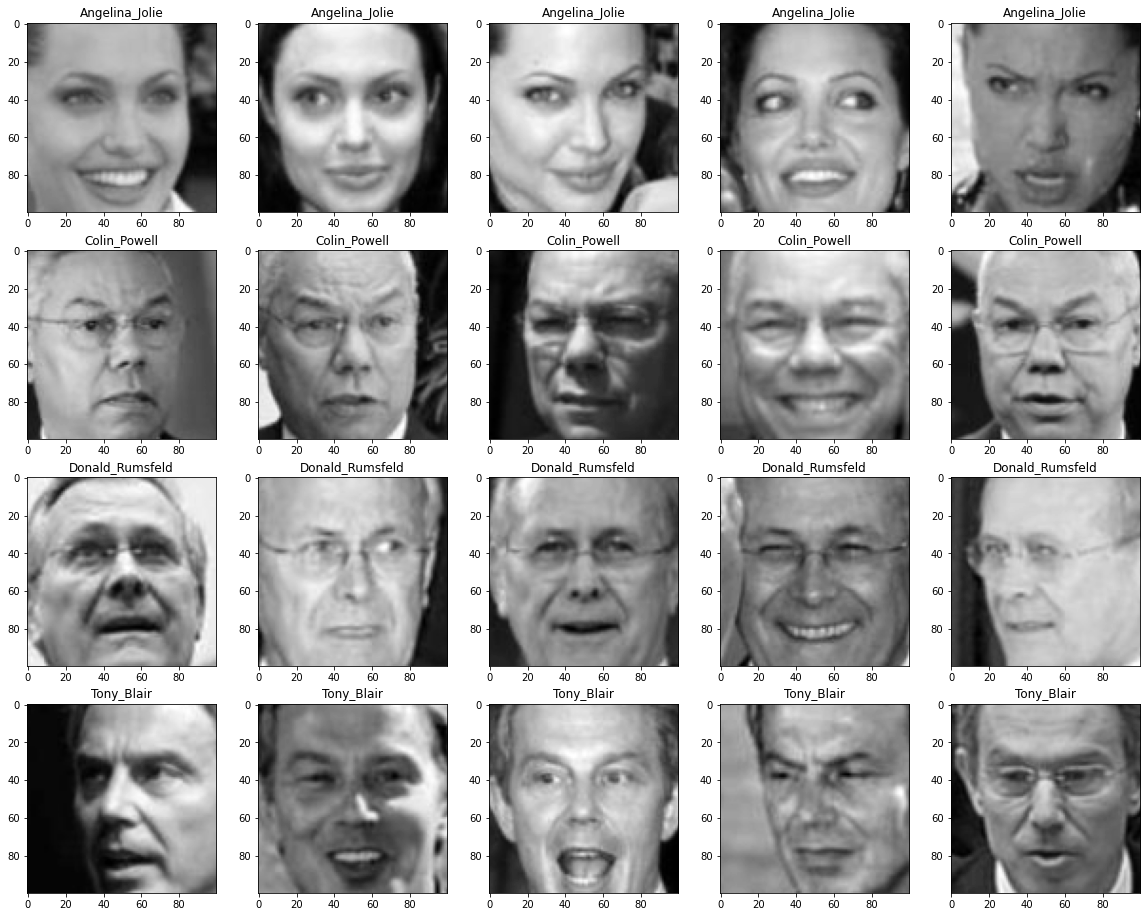

In [73]:
plt.figure(figsize=(20,16))
for i in range(len(image_list)):
    
    img = image_list[i]
    plt.subplot(4, 5, i + 1)
    plt.title(labels[i])
    plt.imshow(img, cmap="gray") # doesn't need reverse matrix, since image_list only 2D (grayscale)

- save croped, resized, grayscaled all image dataset

In [74]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # remove image if exist
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    if os.path.exists(file_path) :
        os.remove(file_path) # remove file using os.remove
        
    # save image
    cv2.imwrite(file_path, img)